<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S05_Data_Preprocessing/S05_LectureEx_1_Notebook_Processing_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S5 - Data Exploration,  Preprocessing and SCM examples
Programming topics covered in this section:
* Data preprocessing

Examples include:
* Exploring Supply Chain health commodity shipment and pricing data

In [2]:
import pandas as pd

## 1. Importing data and creating a report
In this exercise, we will explore some adapted data set which provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. In addition, the data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use. The original data are provided by the US Agency for International Development and can be accessed at [this page](https://catalog.data.gov/dataset/supply-chain-shipment-pricing-data).

This is a description of our adapted data in the file `SCMS_Delivery_History_Dataset.csv`.

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|id| identification number|
|project code|identification of the project|
|country|country to which the items are shipped|
|vendor|identification of the vendor of the item|
|manufacturing site|name of the manufacturer of the item|
|shipment mode|transportation mode (e.g., air, truck)|
|scheduled delivery date|programmed date for delivery|
|delivered to client date|real date of delivery|
|delivery recorded date|registered date of delivery|
|product group|main category of the item|
|product subgroup|subcategory of the item (e.g., HIV test, pediatric, Adult) |
|molecule type|description of the composition of the item (e.g., Nevirapine, HIV 1/2, Didanosine)|
|brand| item brand (e.g, generic or any other commercial brand)|
|dosage| specifications about the dosage of each item (e.g.,10mg/ml, 200mg)|
|dosage form|instructions for consumption (e.g., capsule, tablet, oral solution) |
|units per pack| number of units in each package|
|quantity pack sold| number of packages shipped to the specified country|
|value sold| total value in $\$$ USD of the shipment (i.e., pack_price * quantity pack sold|
|pack price| price in $\$$ USD per package|
|unit price| price in $\$$ USD per unit|
|weight (kilograms)| total weight in kilograms of the shipment|
|freight cost (usd)| value in $\$$USD paid for transportation|
|insurance (usd)|value in $\$$USD paid for insurance|



Let's import our data.

In [3]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S05_Data_Preprocessing/Supply_Chain_Shipment_Pricing_Data.csv'
df_SC = pd.read_csv(url)  # reading data file into a DataFrame
print(df_SC.columns)
# To avoid an issue of having space in the name and to improve "codability", 
# we replace the space and remove special characters from the column names 

df_SC.columns = df_SC.columns.str.replace(' ', '_')
df_SC.columns = df_SC.columns.str.replace('(', '')
df_SC.columns = df_SC.columns.str.replace(')', '')
df_SC.columns = df_SC.columns.str.replace('#', '')
df_SC.columns = df_SC.columns.str.replace('/', '')

df_SC

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')


,id,project_code,pq_,po__so_,asndn_,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,moleculetest_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,line_item_insurance_usd
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",False,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,False,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,False,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17

As the table is relatively large, we only choose our column of interest to be put in the DataFrame:



In [4]:
selected_columns = ['id', 'country', 'shipment_mode', 'scheduled_delivery_date', 'sub_classification',
       'vendor', 'item_description', 'brand', 'line_item_quantity',
       'line_item_value', 'unit_price', 'weight_kilograms', 'freight_cost_usd',
       'line_item_insurance_usd']

df_SC = df_SC[selected_columns].copy() # we make a copy of this to avoid any issue
df_SC

,id,country,shipment_mode,scheduled_delivery_date,sub_classification,vendor,item_description,brand,line_item_quantity,line_item_value,unit_price,weight_kilograms,freight_cost_usd,line_item_insurance_usd
0,1,Côte d'Ivoire,Air,2-Jun-06,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",Reveal,19,551.00,0.97,13,780.34,NaN
1,3,Vietnam,Air,14-Nov-06,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Generic,1000,6200.00,0.03,358,4521.5,NaN
2,4,Côte d'Ivoire,Air,27-Aug-06,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Determine,500,40000.00,0.80,171,1653.78,NaN
3,15,Vietnam,Air,1-Sep-06,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Generic,31920,127360.80,0.07,1855,16007.06,NaN
4,16,Vietnam,Air,11-Aug-06,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Generic,38000,121600.00,0.05,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,Zimbabwe,Truck,31-Jul-15,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Generic,166571,599655.60,0.06,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,Côte d'Ivoire,Truck,31-Jul-15,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Generic,21072,137389.44,0.11,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,Zambia,Truck,31-Aug-15,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,514526,5140114.74,0.33,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,Zimbabwe,Truck,9-Sep-15,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Generic,17465,113871.80,0.11,1392,Freight Included in Commodity Cost,134.03


The column `item_description` provides the description of product. However, we can also assign a unique (distinct) number to each product as well. `pandas` offers a function to create a list of unique ID and map this to the original column by using `factorize` method ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html)). This can be done as follows.

In [5]:
# `codes` gives a list of new values after mapping and `uniques` gives the list of unique values
codes, uniques = pd.factorize(df_SC['item_description']) 
# we now modify the ID a bit and put in the format of 'SKU0000'
codes = ["SKU"+'{:04d}'.format(i) for i in codes]


We can then add a new column to the DataFrame in front of the `item_description` column 

In [6]:
df_SC.insert(6,'item_id',codes)
df_SC


,id,country,shipment_mode,scheduled_delivery_date,sub_classification,vendor,item_id,item_description,brand,line_item_quantity,line_item_value,unit_price,weight_kilograms,freight_cost_usd,line_item_insurance_usd
0,1,Côte d'Ivoire,Air,2-Jun-06,HIV test,RANBAXY Fine Chemicals LTD.,SKU0000,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",Reveal,19,551.00,0.97,13,780.34,NaN
1,3,Vietnam,Air,14-Nov-06,Pediatric,Aurobindo Pharma Limited,SKU0001,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Generic,1000,6200.00,0.03,358,4521.5,NaN
2,4,Côte d'Ivoire,Air,27-Aug-06,HIV test,Abbott GmbH & Co. KG,SKU0002,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Determine,500,40000.00,0.80,171,1653.78,NaN
3,15,Vietnam,Air,1-Sep-06,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,SKU0003,"Lamivudine 150mg, tablets, 60 Tabs",Generic,31920,127360.80,0.07,1855,16007.06,NaN
4,16,Vietnam,Air,11-Aug-06,Adult,Aurobindo Pharma Limited,SKU0004,"Stavudine 30mg, capsules, 60 Caps",Generic,38000,121600.00,0.05,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,Zimbabwe,Truck,31-Jul-15,Pediatric,SCMS from RDC,SKU0140,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Generic,166571,599655.60,0.06,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,Côte d'Ivoire,Truck,31-Jul-15,Adult,SCMS from RDC,SKU0011,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Generic,21072,137389.44,0.11,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,Zambia,Truck,31-Aug-15,Adult,SCMS from RDC,SKU0113,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,514526,5140114.74,0.33,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,Zimbabwe,Truck,9-Sep-15,Adult,SCMS from RDC,SKU0011,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Generic,17465,113871.80,0.11,1392,Freight Included in Commodity Cost,134.03


---
## 2. Preprocessing Data

We can use `df.describe()` function to show descriptive statistics of the numerical data

In [7]:
df_SC.describe()

,id,line_item_quantity,line_item_value,unit_price,line_item_insurance_usd
count,10324.000000,10324.000000,1.032400e+04,10324.000000,10037.000000
mean,51098.968229,18332.534870,1.576506e+05,0.611701,240.117626
std,31944.332496,40035.302961,3.452921e+05,3.275808,500.190568
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,12795.750000,408.000000,4.314593e+03,0.080000,6.510000
50%,57540.500000,3000.000000,3.047147e+04,0.160000,47.040000
75%,83648.250000,17039.750000,1.664471e+05,0.470000,252.400000
max,86823.000000,619999.000000,5.951990e+06,238.650000,7708.440000


Let's take a look at the type of data in our `DataFrame`. We can notice that column `schedule_delivery_date` is `object`, which means it can be string or mixed.

In [8]:
df_SC.dtypes

id                           int64
country                     object
shipment_mode               object
scheduled_delivery_date     object
sub_classification          object
vendor                      object
item_id                     object
item_description            object
brand                       object
line_item_quantity           int64
line_item_value            float64
unit_price                 float64
weight_kilograms            object
freight_cost_usd            object
line_item_insurance_usd    float64
dtype: object

Let's convert the data in column `schedule_delivery_date` to the correct format, as presented below. We can obtain the same results using the function `DataFrame.astype('datatime64')`

In [9]:
# here we replace the original column with the newly formatted one
df_SC['scheduled_delivery_date'] = pd.to_datetime(df_SC['scheduled_delivery_date'])
df_SC.dtypes

id                                  int64
country                            object
shipment_mode                      object
scheduled_delivery_date    datetime64[ns]
sub_classification                 object
vendor                             object
item_id                            object
item_description                   object
brand                              object
line_item_quantity                  int64
line_item_value                   float64
unit_price                        float64
weight_kilograms                   object
freight_cost_usd                   object
line_item_insurance_usd           float64
dtype: object

We can also see that the columns `weight_kilograms` and `freight_cost_usd` are also of type `object`. These data should be a numeric value since it represents kilograms and $USD. However, the raw data have some annotations made by the user, as you can see below by printing the first 10 rows of your DataFrame, so this is why it is recognized as type `object`.

In [10]:
df_SC[['weight_kilograms','freight_cost_usd']].head(10)

,weight_kilograms,freight_cost_usd
0,13,780.34
1,358,4521.5
2,171,1653.78
3,1855,16007.06
4,7590,45450.08
5,504,5920.42
6,328,Freight Included in Commodity Cost
7,1478,6212.41
8,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281)
9,643,Freight Included in Commodity Cost


We can then use the `to_numeric` method in order to convert the values under the `weight_kilograms` and `freight_cost_usd`  columns into a float:

In [11]:
df_SC['weight_kilograms'] = pd.to_numeric(df_SC['weight_kilograms'], errors='coerce')
df_SC['freight_cost_usd'] = pd.to_numeric(df_SC['freight_cost_usd'], errors='coerce')
df_SC.dtypes

id                                  int64
country                            object
shipment_mode                      object
scheduled_delivery_date    datetime64[ns]
sub_classification                 object
vendor                             object
item_id                            object
item_description                   object
brand                              object
line_item_quantity                  int64
line_item_value                   float64
unit_price                        float64
weight_kilograms                  float64
freight_cost_usd                  float64
line_item_insurance_usd           float64
dtype: object

By setting `errors='coerce'`, you will transform the non-numeric values into `NaN`.
Now we can obtain some descriptive statistics for `weight_kg` and `freight_cost_usd` using the `describe()` method.

In [12]:
df_SC.describe()

,id,line_item_quantity,line_item_value,unit_price,weight_kilograms,freight_cost_usd,line_item_insurance_usd
count,10324.000000,10324.000000,1.032400e+04,10324.000000,6372.000000,6198.000000,10037.000000
mean,51098.968229,18332.534870,1.576506e+05,0.611701,3424.441306,11103.234819,240.117626
std,31944.332496,40035.302961,3.452921e+05,3.275808,13526.968270,15813.026692,500.190568
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.750000,0.000000
25%,12795.750000,408.000000,4.314593e+03,0.080000,206.750000,2131.120000,6.510000
50%,57540.500000,3000.000000,3.047147e+04,0.160000,1047.000000,5869.655000,47.040000
75%,83648.250000,17039.750000,1.664471e+05,0.470000,3334.000000,14406.570000,252.400000
max,86823.000000,619999.000000,5.951990e+06,238.650000,857354.000000,289653.200000,7708.440000


---
## 3. Missing data

Now let's take a look at the missing values in our DataFrame. We can see how many missing values we have at each column as follows.

In [13]:
df_SC.isna().sum()

id                            0
country                       0
shipment_mode               360
scheduled_delivery_date       0
sub_classification            0
vendor                        0
item_id                       0
item_description              0
brand                         0
line_item_quantity            0
line_item_value               0
unit_price                    0
weight_kilograms           3952
freight_cost_usd           4126
line_item_insurance_usd     287
dtype: int64

We can notice that there are some missing values in the column `shipment_mode`, which represents the transportation mode (e.g., by air). There is not that much we can do in order to replace these missing values with meaningful information, so we'll replace the missing values of in these columns with the word `'missing'`. We use the `.fillna()` method with the option `inplace=True` to save the changes in our original DataFrame. Check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) for more information about the `.fillna()` method.

In [14]:
df_SC.fillna(value={'shipment_mode': 'missing'}, inplace=True)
df_SC.isna().sum()

id                            0
country                       0
shipment_mode                 0
scheduled_delivery_date       0
sub_classification            0
vendor                        0
item_id                       0
item_description              0
brand                         0
line_item_quantity            0
line_item_value               0
unit_price                    0
weight_kilograms           3952
freight_cost_usd           4126
line_item_insurance_usd     287
dtype: int64

In [15]:
df_SC.freight_cost_usd

0          780.34
1         4521.50
2         1653.78
3        16007.06
4        45450.08
           ...   
10319         NaN
10320         NaN
10321         NaN
10322         NaN
10323         NaN
Name: freight_cost_usd, Length: 10324, dtype: float64

Now we will replace the missing values in column `insurance_usd` by an approximated value, computed as the mean value for this column. Note that we create a new column for this.

In [16]:
insurance_mean = df_SC['line_item_insurance_usd'].mean()
df_SC['item_insurance_rp_mean'] = df_SC['line_item_insurance_usd'].fillna(insurance_mean)
df_SC[['line_item_insurance_usd','item_insurance_rp_mean']][df_SC['line_item_insurance_usd'].isna() == True]



,line_item_insurance_usd,item_insurance_rp_mean
0,NaN,240.117626
1,NaN,240.117626
2,NaN,240.117626
3,NaN,240.117626
4,NaN,240.117626
...,...,...
2496,NaN,240.117626
2497,NaN,240.117626
2499,NaN,240.117626
2500,NaN,240.117626


The issue about replacing the `NaN` value by the mean or another constant is that it disregards other features/values of the data point. To overcome this is issue, we can opt to impute each missing value by using an estimation or prediction based on other data points. One practical method is to use the k-nearest neighbors (KNN) algorithm for imputation. More details can be found in this [link1](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) and this [link2](
https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/) This can be done using the code below which take the weighted sum of the values from the two closest data points to each missing value.

In [17]:
import sklearn
from sklearn.impute import KNNImputer

# First we determine which columns we want to use as references for matching
inferred_columns = ['line_item_value','weight_kilograms', 'freight_cost_usd']
# Copy only the relevant columns to the new DataFrame
df_SC_kNN = df_SC[inferred_columns].copy()
# Add the column `line_item_insurance_(usd)` which we want to impute and assigns a new name to it
df_SC_kNN['item_insurance_rp_kNN'] = df_SC['line_item_insurance_usd']

# Set up the imputer object with the number of neighbors = 2 
imputer = sklearn.impute.KNNImputer(n_neighbors=2)
# Train to determine the neighbors and estimate the new values for all the missing values.
# This process might be time consuming if the size of the data and neighborhood are large.
# The new values are then assigned back to the DataFrame. # Since the method return an array (not a DataFrame), 
# we need to assign it back to the array values of the DataFrame, i.e., `df_SC_kNN[:]`
df_SC_kNN[:] = imputer.fit_transform(df_SC_kNN)

# copy the new column to t
df_SC['item_insurance_rp_kNN'] = df_SC_kNN['item_insurance_rp_kNN'].copy()


In [18]:
# Now we can examine the results
df_SC[['item_insurance_rp_mean','item_insurance_rp_kNN']][df_SC['line_item_insurance_usd'].isna() == True]

,item_insurance_rp_mean,item_insurance_rp_kNN
0,240.117626,0.725
1,240.117626,8.955
2,240.117626,71.200
3,240.117626,194.285
4,240.117626,238.570
...,...,...
2496,240.117626,63.350
2497,240.117626,46.340
2499,240.117626,21.980
2500,240.117626,629.235


In [19]:
df_SC.isna().sum()

id                            0
country                       0
shipment_mode                 0
scheduled_delivery_date       0
sub_classification            0
vendor                        0
item_id                       0
item_description              0
brand                         0
line_item_quantity            0
line_item_value               0
unit_price                    0
weight_kilograms           3952
freight_cost_usd           4126
line_item_insurance_usd     287
item_insurance_rp_mean        0
item_insurance_rp_kNN         0
dtype: int64

---
## 4. Data Transformation

### Scaling methods
Variables tend to have different ranges and some algorithms are adversely affected by differences in variable ranges. Variables with greater ranges tend to have larger influence on data model’s results. Therefore, numeric field values may need to be standardized/normalized. 

From the output of the `describe()` method in the previous line of code, we can notice that the numerical variables have different ranges. For instance, `units_per_pack` varies from 1 to 1000, while `weight_kg` varies from 0 to 857354. We would like to apply normalization method to scale the numerical values in our data. 

Let's apply the **min-max normalization** and **z-score normalization** methods, by identifying how much greater the field value is than the minimum value, and scaling this difference by the range of field values.

$$X^{norm}_i=\frac{X_i-X_{min}}{X_{max}-X_{min}}$$
and
$$Z_i=\frac{X_i-X_{mean}}{\sigma_X}$$
Thus,  I compute the normalized version of each of the numerical variable and add this as a new column of our data frame. We can proceed as follows. 

First, we create a list of the columns we want to normalize. 

In [20]:
columns_to_norm = ['line_item_quantity',	'line_item_value']

Then, I can create a `for` loop to compute the normalized version for each one of these columns and add it to `df_SC`. 

In [21]:
for col in columns_to_norm:
    df_SC[col + '_norm'] = (df_SC[col] - df_SC[col].min())/(df_SC[col].max() - df_SC[col].min())   # add the new normalized column
    df_SC[col + '_z'] = (df_SC[col] - df_SC[col].mean())/df_SC[col].std()    # add the new z-norm column
    

In [22]:
df_SC[['line_item_value','line_item_value_norm','line_item_value_z']].describe()

,line_item_value,line_item_value_norm,line_item_value_z
count,1.032400e+04,10324.000000,1.032400e+04
mean,1.576506e+05,0.026487,-1.030322e-16
std,3.452921e+05,0.058013,1.000000e+00
min,0.000000e+00,0.000000,-4.565716e-01
25%,4.314593e+03,0.000725,-4.440762e-01
50%,3.047147e+04,0.005120,-3.683233e-01
75%,1.664471e+05,0.027965,2.547575e-02
max,5.951990e+06,1.000000,1.678098e+01


In order to deal with **skewed data**, we can also use a scaling technique (such as log transformation). For example, we ca transform the column `line_item_value` as follows.

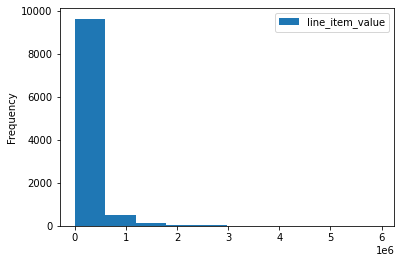

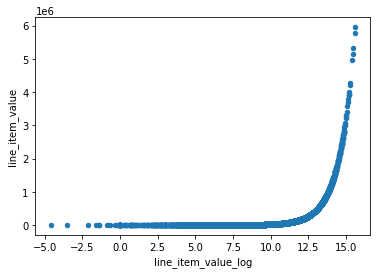

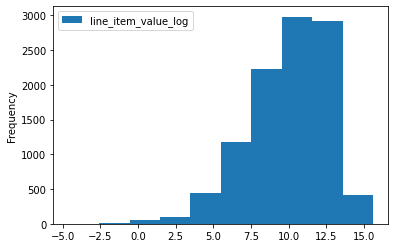

In [24]:
# first we evaluate the distribution of the value
df_SC[['line_item_value']].plot(kind = 'hist')

# apply the transformation
import math
# note that math.log calculates a natural log (i.e., ln(x))
df_SC['line_item_value_log'] = [math.log(x) if x > 0 else 0 for x in df_SC['line_item_value']]

# plot to compare the results
df_SC[['line_item_value','line_item_value_log']].plot(x = 'line_item_value_log', y = 'line_item_value', kind = 'scatter')

df_SC[['line_item_value_log']].plot(kind = 'hist')

### Dummy Variables
A categorical variable should generally be encoded as **dummy variables** (a.k.a. indicator variables), each taking only one of two values (0 or 1; False or True)
When a categorical variable takes k possible values, you typically have two options to define your dummy variables:
* Option 1: Define k-1 dummy variables, and use the unassigned category as the reference category
* Option 2: Define k dummy variables. Often referred to as **one-hot** encoding.

Let's transform our categorical variable `shipment` into dummy variables using `Option 1`. First, let's take a look at the possible values for the categorical values.

In [ ]:
df_SC['shipment_mode'].unique()

array(['Air', 'missing', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

We will create 4 dummy variables with names `'Air'`,  `'Truck'`, `'Air Charter'` and `'Ocean'`, and use `'missing'` as our reference category. One way to do this is by making use of the `DataFrame` function `pd.get_dummies()`, which automatically  converts categorical variable into dummy/indicator variables. You can check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) for more information. 

In [ ]:
df_dummies = pd.get_dummies(df_SC['shipment_mode'])
df_dummies.head()
# concatenating the original df_SC with df_dummy
df_SC = pd.concat([df_SC, df_dummies], axis=1) 

Then, we can add the new `DataFrame` we just created (`df_dummies`) to our original `DataFrame`.  We can do this using the function `pd.concat()` and the method `DataFrame.drop()`

In [ ]:
df_SC[['shipment_mode']+list(df_dummies.columns)].describe()

,Air,Air Charter,Ocean,Truck,missing
count,10324.000000,10324.000000,10324.000000,10324.000000,10324.00000
mean,0.592115,0.062960,0.035936,0.274119,0.03487
std,0.491465,0.242903,0.186139,0.446091,0.18346
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


## Transforming numerical variables into categorical variables
In some cases, categorical variables may be preferred over numerical ones. We then need to partition the numerical variables into bins according to a specific criteria.
As an example, let's transform our original variable `weight_kilograms` into a categorical variable with values `'light'` (if the weight is up to 100 kg), `'medium'`(if the weight is within the interval (100 kg, 500 kg]), `'heavy'` (if the weight is within the interval (500 kg, 1000 kg]) and `'super-heavy'`(if the weight is > 1000 kg). 

We can implement this transformation using the function `pd.cut()`, which helps us to segment and sort data values into bins. You can check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) for more information on this function.


In [ ]:
bins = [0, 100., 500., 1000.,  float('inf')]             # defining the bins 
names = ['light', 'medium', 'heavy', 'super-heavy']      # defining the names for the categories
df_SC['weight_category'] = pd.cut(df_SC['weight_kilograms'], bins, labels=names, include_lowest=True)  # adding the new cat. var. to our DF
df_SC[['weight_kilograms','weight_category']].head(10)

,weight_kilograms,weight_category
0,13.0,light
1,358.0,medium
2,171.0,medium
3,1855.0,super-heavy
4,7590.0,super-heavy
5,504.0,heavy
6,328.0,medium
7,1478.0,super-heavy
8,NaN,NaN
9,643.0,heavy
